**HOMEWORK-3**

*   Generate dataset using make_blobs function in the sklearn.datasets class.Generate 2000 samples with 3 features (X) with one label (y).
*   Explore and analyse raw data.
*   Do preprocessing for classification.
*   Split your dataset into train and test test (0.7 for train and 0.3 for test).
*   Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
*   Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [ ]:
# Creating the dataset using the make_blobs function in the sklearn.datasets class.
from sklearn.datasets import make_blobs

In [ ]:
# Creating 2000 samples with 3 features (X) with one label (y)
X, y = make_blobs(n_samples=2000, centers=None, n_features=3,random_state=0)
print(X.shape)

(2000, 3)


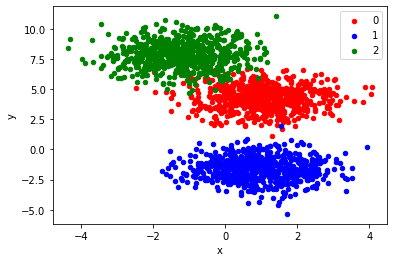

In [ ]:
# Exploring and analysing raw data.
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot

df_blobs = DataFrame(dict(x=X[:,0], y=X[:,1],z=X[:,2], label=y))
df_blobs.head()

colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df_blobs.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [ ]:
df_blobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
 2   z       2000 non-null   float64
 3   label   2000 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 54.8 KB


In [ ]:
# Viewing the data statistics
df_blobs.describe()

,x,y,z,label
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.240772,3.493821,4.739933,0.999500
std,1.420266,4.002951,3.407143,0.816599
min,-4.365209,-5.351844,-1.459501,0.000000
25%,-0.758331,-0.964595,2.115543,0.000000
50%,0.381250,4.278380,3.208216,1.000000
75%,1.244579,7.137660,8.649354,2.000000
max,4.077801,11.046691,12.079492,2.000000


In [ ]:
# Checking missing values
df_blobs.isna().sum()

x        0
y        0
z        0
label    0
Label    0
dtype: int64

In [ ]:
df_blobs.groupby(by="label").count()

,x,y,z,Label
label,,,,
0,667,667,667,667
1,667,667,667,667
2,666,666,666,666


In [ ]:
# Pre-processing for classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
df_blobs["Label"] = label_encoder.fit_transform(df_blobs["label"])
df_blobs.head()

,x,y,z,label,Label
0,0.378197,-0.822654,4.412505,1,1
1,0.112908,8.072768,9.914998,2,2
2,1.875986,-2.862337,1.955307,1,1
3,-1.210594,6.876798,9.223306,2,2
4,2.095730,3.335208,3.288496,0,0


In [ ]:
df_blobs["Label"].value_counts()

1    667
0    667
2    666
Name: Label, dtype: int64

In [ ]:
# Checking encoded labels
categories = list(label_encoder.inverse_transform([0, 1, 2,]))
print(categories)

[0, 1, 2]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 120)
print(X_train)

[[-0.46076671  7.56132248 11.30906633]
 [-2.123458    6.66603792 10.20393663]
 [ 0.74997075 -2.81197909  1.63114719]
 ...
 [ 0.19234901 -2.27067941  3.38409016]
 [ 1.03334175  0.06191932  2.53209057]
 [ 0.98450704 -1.58083416  2.12476001]]


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2, random_state=32)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9992857142857143
Accuracy of test: 0.9983333333333333


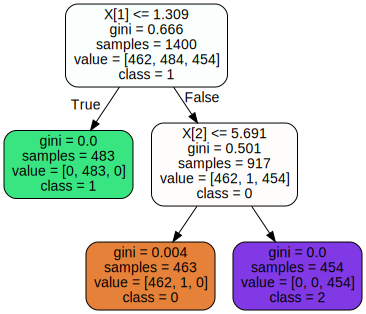

In [ ]:
# Visualization
import os
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     class_names=classes,
                     filled=True, rounded=True
                    )
graph = graphviz.Source(dot_data)
graph

In [ ]:
# XGBoos
import xgboost as xgb

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

preds = model.predict(dmatrix_test)
preds[:10]

array([[0.00197459, 0.99619377, 0.00183163],
       [0.00200238, 0.00184313, 0.9961545 ],
       [0.99605274, 0.00197693, 0.0019703 ],
       [0.00200238, 0.00184313, 0.9961545 ],
       [0.00197459, 0.99619377, 0.00183163],
       [0.9963188 , 0.0018437 , 0.00183751],
       [0.00197459, 0.99619377, 0.00183163],
       [0.00197459, 0.99619377, 0.00183163],
       [0.9963188 , 0.0018437 , 0.00183751],
       [0.00197728, 0.996191  , 0.00183163]], dtype=float32)

In [ ]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2,
       1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0,
       0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2,
       0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2,
       0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2,
       1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0,
       2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       0.99      1.00      1.00       183
           2       1.00      1.00      1.00       212

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [ ]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9981884057971014
Recall = 0.9983739837398374
Accuracy = 0.9983333333333333
F1 Score = 0.9982767388615373


The accuracy of the training and test set is approximately 1. Therefore, there is a problem of underfitting and overfitting.